# Hotel Booking Demand

## Business Problem Understanding

### Context

Hotel merupakan sebuah business yang bergerak dalam model business yang berfokus pada hospitality. Hotel tidak jauh dari permintaan pelangaan secara musiman dan juga dari mana biasanya pelanggan melakukan booking untuk kamar hotel sehingga, dalam analysis ini saya ingin melakukan pendalaman terhadap :
 - Permintaan Musiman Hotel
 - Analysis Sumber Booking


### Pernyataan Masalah

Sebagai sebuah model busines yang bergerak dalam hospitality, tentu saja kepuasaan pelanggan atau tamu merupakan hal utama yang harus diprioritaskan, sehingga bentuk kepauasan pelanggan naik dan berdampak positif kepada sektor - sektor lain mengenai hotel tersebut. 

Dnegan mempertimbangkan beberapa hal yang dapat memengaruhi tingkat kepuasaan pelanggan dan image hotel yang baik, manajemen ingin data anlyst untuk melakukan analysis pada pertanyaan berikut:

 - Kapan waktu puncak dan rendahnya permintaan kamar hotel?
 - Melalui kanal mana saja reservasi hotel yang paling banyak dilakukan?

Diharapkan, dengan mendapatkan jawaban dari pernyataan masalah2 di atas, pihak manajemen hotel dapat merencanakan strategi yang strategis untuk meningkatkan value dari pelayanan hotel sehinggan mendapatkan feedback yang baik juga dengan bentuk kepuasaan pelanggan yang dapat meningkatkan banyak value kepada semua sektor.

# Data Preperation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, pearsonr


pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('X:\hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Dataset berikut ini memiliki isi sebagai berikut :

hotel : There are only two hotel types: Resort Hotel or City Hotel

is_canceled : "Value indicating if the booking was canceled (1) or not (0)

lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

meal: Type of meal booked. Categories are presented in standard hospitality meal packages:

    Undefined/SC – no meal package
    BB – Bed & Breakfast
    HB – Half board (breakfast and one other meal – usually dinner)
    FB – Full board (breakfast, lunch and dinner)

country: Country of origin. Categories are represented in the ISO 3155–3:2013 format

market_segment: Market segment designation.

    “TA” means “Travel Agents”
    “TO” means “Tour Operators”

distribution_channel: Booking distribution channel.

    “TA” means “Travel Agents”
    “TO” means “Tour Operators”

is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type: Code of room type reserved.

assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.

booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type: Indication on if the customer made a deposit to guarantee the booking.

This variable can assume three categories:

    No Deposit – no deposit was made
    Non Refund – a deposit was made in the value of the total stay cost
    Refundable – a deposit was made with a value under the total cost of stay

agent: ID of the travel agency that made the booking


company: ID of the company/entity that made the booking or responsible for paying the booking.

days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type: Type of booking, assuming one of four categories:

    Contract - when the booking has an allotment or other type of contract associated to it
    Group – when the booking is associated to a group
    Transient – when the booking is not part of a group or contract, and is not associated to other Transient parties
    Transient Party - when the booking is transient, but is associated to at least other transient booking

adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces: Number of car parking spaces required by the customer

total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status: Reservation last status, assuming one of three categories:

    Canceled – booking was canceled by the customer
    Check-Out – customer has checked in but already departed
    No-Show – customer did not check-in and did inform the hotel of the reason why

reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [3]:
df.shape

(119390, 32)

In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## Filrtered Data Only hotel in Portugal

Selanjtnya, karena saya akan lebih befokus pada hotel yang berada di portugal dengan kode negara PRT, maka saya akan memfilter sehingga hanya data - data mengenai hotel di portugal yang akan di analysis

In [5]:
df_filtered = df[df['country'] == 'PRT']

df_filtered = df_filtered.reset_index(drop=True)

In [6]:
df_filtered


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
4,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48585,City Hotel,0,188,2017,August,35,30,0,4,3,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,129.60,0,0,Check-Out,2017-09-03
48586,City Hotel,0,110,2017,August,35,29,0,5,2,0.0,0,HB,PRT,Direct,Direct,0,0,0,D,D,1,No Deposit,14.0,NaN,0,Transient,171.00,0,2,Check-Out,2017-09-03
48587,City Hotel,0,47,2017,August,35,31,1,3,1,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,423.0,NaN,0,Transient,91.02,0,0,Check-Out,2017-09-04
48588,City Hotel,0,210,2017,August,35,28,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,7.0,NaN,0,Transient,85.59,0,1,Check-Out,2017-09-04


In [7]:
display(df_filtered.describe(), df_filtered.describe(include='object'))

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,48590.000000,48590.000000,48590.000000,48590.000000,48590.000000,48590.000000,48590.000000,48590.000000,48586.000000,48590.000000,48590.000000,48590.000000,48590.000000,48590.000000,37593.000000,4505.000000,48590.000000,48590.000000,48590.000000,48590.000000
mean,0.566351,115.569479,2015.992900,27.570344,15.836757,0.739000,2.176291,1.772608,0.071379,0.008994,0.066886,0.189504,0.302140,0.169829,97.227995,169.411543,4.054085,92.041483,0.063799,0.367360
std,0.495583,123.913205,0.735246,13.928847,8.750353,0.941889,1.757382,0.693412,0.333028,0.106109,0.249827,1.163646,2.291472,0.553551,113.168673,139.136195,22.437347,53.696839,0.245490,0.691392
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2015.000000,16.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,45.000000,0.000000,62.000000,0.000000,0.000000
50%,1.000000,72.000000,2016.000000,28.000000,16.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,135.000000,0.000000,85.000000,0.000000,0.000000
75%,1.000000,181.000000,2017.000000,39.000000,24.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,270.000000,0.000000,112.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,3.000000,5.000000


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,48590,48590,48590,48590,48590,48590,48590,48590,48590,48590,48590,48590
unique,2,12,5,1,8,5,10,12,3,4,3,921
top,City Hotel,August,BB,PRT,Groups,TA/TO,A,A,No Deposit,Transient,Canceled,2015-10-21
freq,30960,5154,39556,48590,13893,36780,39437,34265,34366,35130,26756,1402


In [8]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df_filtered.columns :
    listItem.append( [col, df_filtered[col].dtypes, df_filtered[col].nunique(), df_filtered[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Types', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Types,Number of Unique,Unique Sample
0,hotel,object,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,2,"[0, 1]"
2,lead_time,int64,467,"[342, 737, 0, 9, 85, 75, 23, 35, 37, 72, 78, 60, 77, 99, 96, 45, 40, 36, 43, 107, 47, 10, 3, 71, 63, 62, 101, 2, 51, 48, 81, 368, 79, 21, 109, 95, 102, 26, 73, 115, 29, 92, 30, 33, 32, 1, 5, 44, 64, 90, 34, 93, 97, 82, 94, 111, 84, 7, 66, 104, 28, 68, 86, 65, 67, 8, 88, 292, 113, 83, 105, 280, 17, 12, 24, 103, 249, 69, 22, 91, 11, 13, 108, 31, 87, 100, 304, 117, 110, 54, 59, 58, 116, 55, 321, 38, 42, 98, 118, 76, ...]"
3,arrival_date_year,int64,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,int64,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
6,arrival_date_day_of_month,int64,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
7,stays_in_weekend_nights,int64,13,"[0, 2, 1, 3, 6, 4, 5, 7, 8, 12, 9, 16, 14]"
8,stays_in_week_nights,int64,28,"[0, 2, 3, 4, 5, 8, 1, 6, 7, 15, 10, 11, 12, 9, 14, 16, 13, 20, 30, 19, 24, 40, 21, 22, 34, 35, 18, 25]"
9,adults,int64,14,"[2, 3, 1, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


Secara Umum, bisa dilihat bahwasannya :

1. Terdapat 2 tipe hotel __Resort Hotel__ dan __City Hotel__
2. Menghilangkan beberapa column yang tidak relevan dengan masalah yang akan di analysis

## Duplicated Data


In [9]:
df_filtered.duplicated().sum()


21137

In [10]:
df_filtered = df_filtered.drop_duplicates()

## Missing Value

In [11]:
df_filtered.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7855
company                           23886


Missing value hanya terdapat pada future agent dan company yang dimana features ini tidak dibutuhkan dalam proses analysis saya, sehingga lebih baik untuk dihapus saja

In [12]:
df_filtered = df_filtered.drop(['agent', 'company'], axis=1)

## Handle Inconsistency of A Column 

Terdapat inconsistency dalam column __stays_in_weekeend_nights__ dan __stays_in_week_nights__ , yaitu kedua column tersebut memiliki value 0 dalam data. hal ini tidak masuk akal karena biasanaya guest menginap paling minimal satu malam sebelum checked-out

Sehingga lebih baik untuk menghapus data yang memilki value 0 di kedua column tersebut.

In [13]:
df_filtered = df_filtered[(df_filtered['stays_in_weekend_nights'] != 0) | (df_filtered['stays_in_week_nights'] != 0)]

df_filtered = df_filtered.reset_index(drop=True)

In [14]:
df_filtered

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03
1,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03
2,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,2015-05-06
3,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,2015-04-22
4,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,2015-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26908,City Hotel,0,188,2017,August,35,30,0,4,3,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,129.60,0,0,Check-Out,2017-09-03
26909,City Hotel,0,110,2017,August,35,29,0,5,2,0.0,0,HB,PRT,Direct,Direct,0,0,0,D,D,1,No Deposit,0,Transient,171.00,0,2,Check-Out,2017-09-03
26910,City Hotel,0,47,2017,August,35,31,1,3,1,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,91.02,0,0,Check-Out,2017-09-04
26911,City Hotel,0,210,2017,August,35,28,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,85.59,0,1,Check-Out,2017-09-04


In [15]:
df_filtered[df_filtered['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [16]:

min_adr = df_filtered[df_filtered['adr'] > 0]['adr'].min()
df_filtered['adr'] = df_filtered['adr'].replace(0, min_adr)


## Added Some Column

### Handler Outliers

In [17]:
df_filtered.adr.describe()

count    26913.000000
mean        97.794973
std         64.687151
min          1.000000
25%         62.000000
50%         87.000000
75%        125.000000
max       5400.000000
Name: adr, dtype: float64

In [18]:
Q1 = df_filtered['adr'].quantile(0.25)
Q3 = df_filtered['adr'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_filtered[(df_filtered['adr'] < lower_bound) | (df_filtered['adr'] > upper_bound)]

df_filtered['NewAdr'] = df_filtered['adr'].clip(lower_bound, upper_bound)


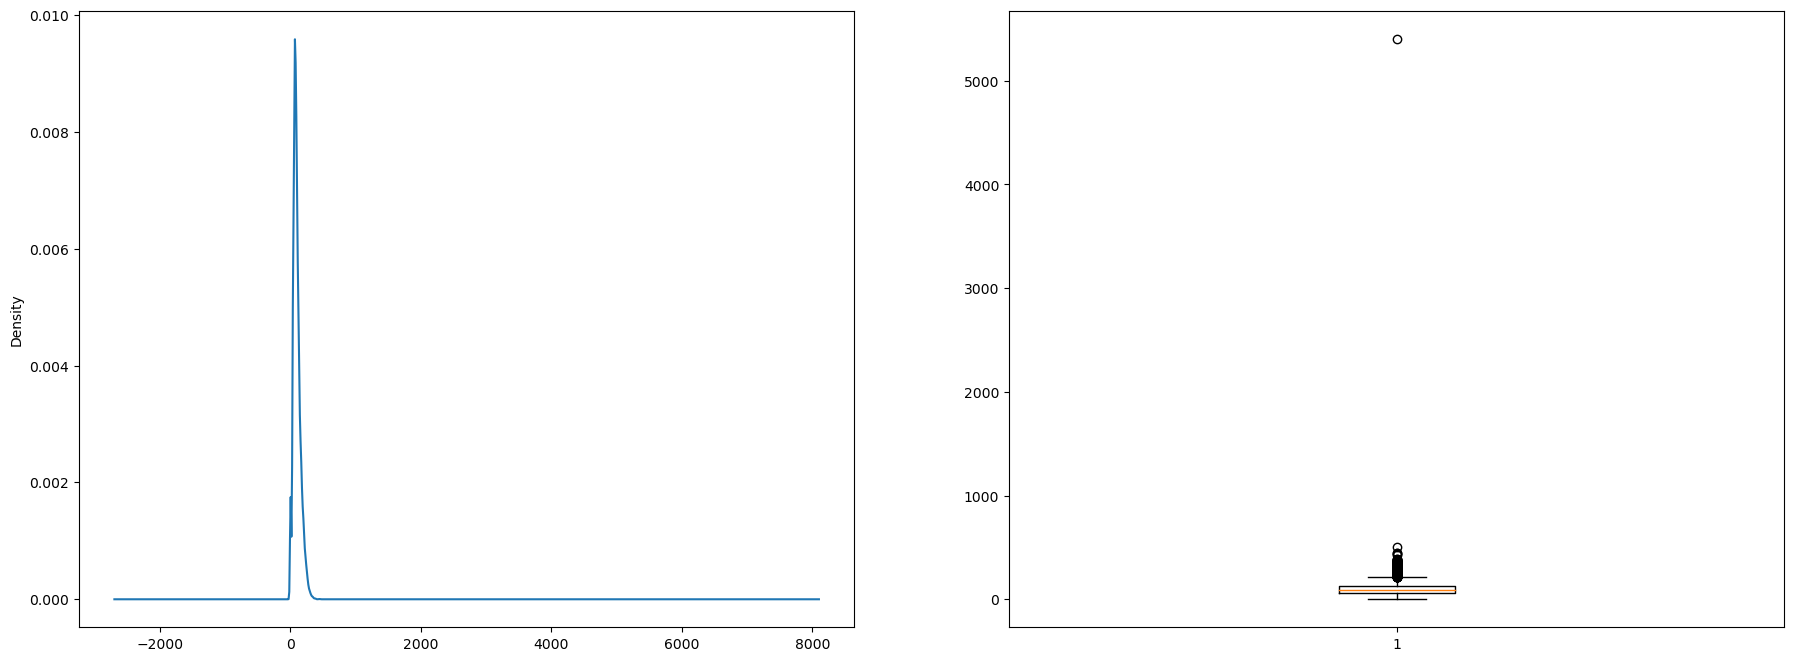

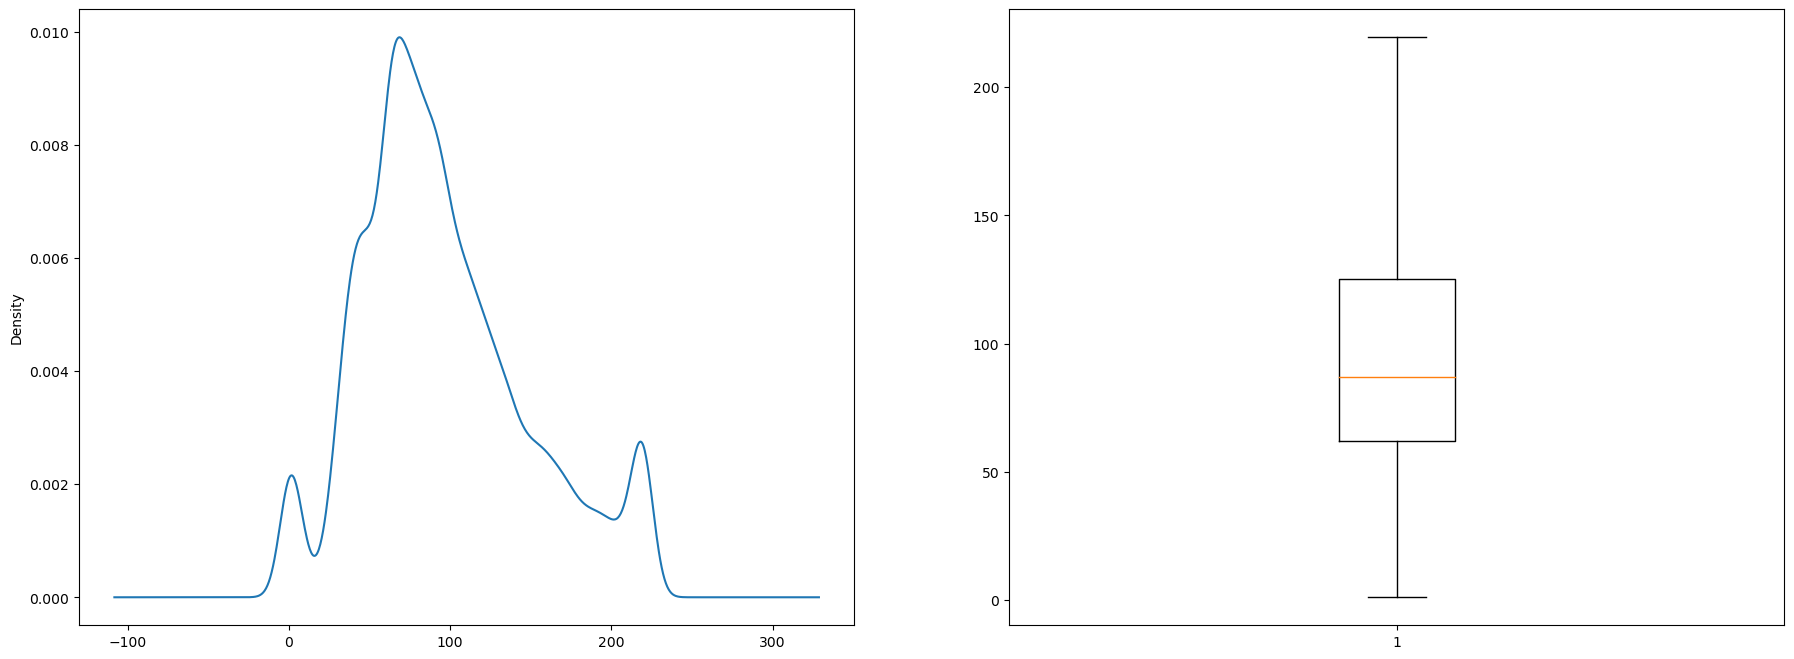

In [19]:
f = plt.figure(figsize=(22,8))
f.add_subplot(1,2,1)
df_filtered['adr'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df_filtered['adr'])

f = plt.figure(figsize=(22,8))
f.add_subplot(1,2,1)
df_filtered['NewAdr'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df_filtered['NewAdr'])
plt.show()

In [20]:
df_filtered.NewAdr.describe()

count    26913.00000
mean        96.19433
std         51.92038
min          1.00000
25%         62.00000
50%         87.00000
75%        125.00000
max        219.50000
Name: NewAdr, dtype: float64

### Added Total_Night Column

Untuk Memudahkan perhitungan terahadap berapa lama gusts menginap maka, column __stays_in_weekend_nights__ akan dijumlahkan dengan __stays_in_week_nights__ untuk mendapatkan total berapa lama guest menginap

In [21]:
df_filtered['total_night'] = df_filtered['stays_in_weekend_nights'] + df_filtered['stays_in_week_nights']

### Break down reservation_date into day, month, year

In [22]:
df_filtered['reservation_status_date'] = pd.to_datetime(df_filtered['reservation_status_date'])


In [23]:
df_filtered['reservation_year'] = df_filtered['reservation_status_date'].dt.year
df_filtered['reservation_month'] = df_filtered['reservation_status_date'].dt.month
df_filtered['reservation_week'] = df_filtered['reservation_status_date'].dt.isocalendar().week
df_filtered['reservation_day'] = df_filtered['reservation_status_date'].dt.day

### Added Revenue

In [24]:
df_filtered['Revenue'] = df_filtered['NewAdr'] * df_filtered['total_night']

### Added Arrival Date

In [25]:

df_filtered['arrival_date_year'] = df_filtered['arrival_date_year'].astype(str)
df_filtered['arrival_date_month'] = df_filtered['arrival_date_month'].astype(str)
df_filtered['arrival_date_day_of_month'] = df_filtered['arrival_date_day_of_month'].astype(str)


df_filtered['arrival_date'] = df_filtered['arrival_date_year'] + '-' + df_filtered['arrival_date_month'] + '-' + df_filtered['arrival_date_day_of_month']


df_filtered['arrival_date'] = pd.to_datetime(df_filtered['arrival_date'], format='%Y-%B-%d')


print(df_filtered['arrival_date'])


0       2015-07-01
1       2015-07-01
2       2015-07-01
3       2015-07-01
4       2015-07-01
           ...    
26908   2017-08-30
26909   2017-08-29
26910   2017-08-31
26911   2017-08-28
26912   2017-08-28
Name: arrival_date, Length: 26913, dtype: datetime64[ns]


## Future Selection

In [54]:
df_filtered.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'NewAdr',
       'total_night', 'reservation_year', 'reservation_month',
       'reservation_week', 'reservation_day', 'Revenue', 'arrival_date'],
      dtype='object')

In [27]:
Hotel = ['hotel', 'is_canceled', 'arrival_date', 'total_night', 'distribution_channel', 'reservation_status', 'reservation_status_date', 'reservation_year', 'reservation_month', 'reservation_day', 'NewAdr', 'Revenue']

In [28]:
dfHotel = df_filtered[Hotel]
dfHotel

,hotel,is_canceled,arrival_date,total_night,distribution_channel,reservation_status,reservation_status_date,reservation_year,reservation_month,reservation_day,NewAdr,Revenue
0,Resort Hotel,0,2015-07-01,2,Direct,Check-Out,2015-07-03,2015,7,3,107.00,214.00
1,Resort Hotel,0,2015-07-01,2,Direct,Check-Out,2015-07-03,2015,7,3,103.00,206.00
2,Resort Hotel,1,2015-07-01,3,TA/TO,Canceled,2015-05-06,2015,5,6,82.00,246.00
3,Resort Hotel,1,2015-07-01,3,TA/TO,Canceled,2015-04-22,2015,4,22,105.50,316.50
4,Resort Hotel,1,2015-07-01,4,TA/TO,Canceled,2015-06-23,2015,6,23,123.00,492.00
...,...,...,...,...,...,...,...,...,...,...,...,...
26908,City Hotel,0,2017-08-30,4,TA/TO,Check-Out,2017-09-03,2017,9,3,129.60,518.40
26909,City Hotel,0,2017-08-29,5,Direct,Check-Out,2017-09-03,2017,9,3,171.00,855.00
26910,City Hotel,0,2017-08-31,4,TA/TO,Check-Out,2017-09-04,2017,9,4,91.02,364.08
26911,City Hotel,0,2017-08-28,7,TA/TO,Check-Out,2017-09-04,2017,9,4,85.59,599.13


# Data Analysis

## Peak and Drop of Resort & City Hotel Booking Season

### 2015

In [29]:
year_2015_checkouts_resort = dfHotel[(dfHotel['reservation_year'] == 2015) & (dfHotel['reservation_status'] == 'Check-Out') & (dfHotel['hotel'] == 'Resort Hotel')]
year_2015_checkouts_city = dfHotel[(dfHotel['reservation_year'] == 2015) & (dfHotel['reservation_status'] == 'Check-Out') & (dfHotel['hotel'] == 'City Hotel')]

year_2015_cancellation_resort = dfHotel[(dfHotel['reservation_year'] == 2015) & (dfHotel['reservation_status'] == 'Canceled') & (dfHotel['hotel'] == 'Resort Hotel')]
year_2015_cancellation_city = dfHotel[(dfHotel['reservation_year'] == 2015) & (dfHotel['reservation_status'] == 'Canceled') & (dfHotel['hotel'] == 'City Hotel')]


year_2015_noshows_resort = dfHotel[(dfHotel['reservation_year'] == 2015) & (dfHotel['reservation_status'] == 'No-Show') & (dfHotel['hotel'] == 'Resort Hotel')]
year_2015_noshows_city = dfHotel[(dfHotel['reservation_year'] == 2015) & (dfHotel['reservation_status'] == 'No-Show') & (dfHotel['hotel'] == 'City Hotel')]


print('Check-Out Resort Hotel : ', year_2015_checkouts_resort.shape)
print('Check-Out City Hotel : ', year_2015_checkouts_city.shape)

print('Cancellation Resort Hotel : ', year_2015_cancellation_resort.shape)
print('Cancellation City Hotel : ', year_2015_cancellation_city.shape)

print('No-Shows Resort Hotel : ', year_2015_noshows_resort.shape)
print('No-Shows City Hotel : ', year_2015_noshows_city.shape)


Check-Out Resort Hotel :  (2053, 12)
Check-Out City Hotel :  (1824, 12)
Cancellation Resort Hotel :  (1425, 12)
Cancellation City Hotel :  (1497, 12)
No-Shows Resort Hotel :  (46, 12)
No-Shows City Hotel :  (98, 12)


In [30]:
# Resort Hotel
monthly_bookings_checkouts_resort = year_2015_checkouts_resort.groupby('reservation_month').size().reset_index(name='num_bookings')
monthly_bookings_cancellation_resort = year_2015_cancellation_resort.groupby('reservation_month').size().reset_index(name='num_bookings')
monthly_bookings_noshows_resort = year_2015_noshows_resort.groupby('reservation_month').size().reset_index(name='num_bookings')

# City Hotel
monthly_bookings_checkouts_city = year_2015_checkouts_city.groupby('reservation_month').size().reset_index(name='num_bookings')
monthly_bookings_cancellation_city = year_2015_cancellation_city.groupby('reservation_month').size().reset_index(name='num_bookings')
monthly_bookings_noshows_city = year_2015_noshows_city.groupby('reservation_month').size().reset_index(name='num_bookings')




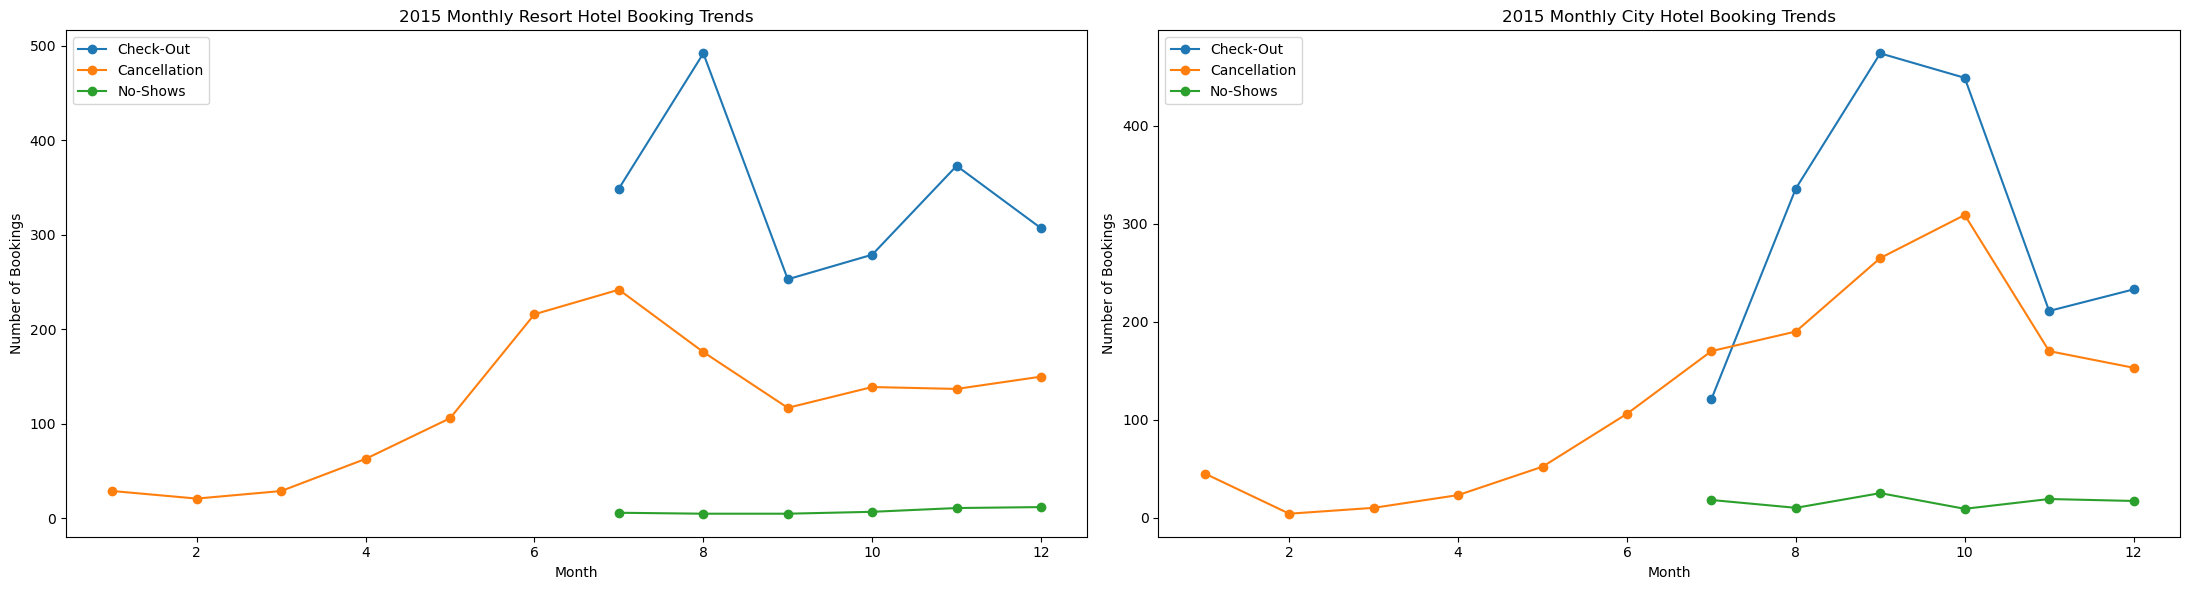

In [31]:
plt.figure(figsize=(22, 6))

# First subplot: Resort Hotel Booking Trends
plt.subplot(1, 2, 1)
plt.plot(monthly_bookings_checkouts_resort['reservation_month'], monthly_bookings_checkouts_resort['num_bookings'], marker='o', label='Check-Out')
plt.plot(monthly_bookings_cancellation_resort['reservation_month'], monthly_bookings_cancellation_resort['num_bookings'], marker='o', label='Cancellation')
plt.plot(monthly_bookings_noshows_resort['reservation_month'], monthly_bookings_noshows_resort['num_bookings'], marker='o', label='No-Shows')
plt.title('2015 Monthly Resort Hotel Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(loc='upper left')

# Second subplot: City Hotel Booking Trends
plt.subplot(1, 2, 2)
plt.plot(monthly_bookings_checkouts_city['reservation_month'], monthly_bookings_checkouts_city['num_bookings'], marker='o', label='Check-Out')
plt.plot(monthly_bookings_cancellation_city['reservation_month'], monthly_bookings_cancellation_city['num_bookings'], marker='o', label='Cancellation')
plt.plot(monthly_bookings_noshows_city['reservation_month'], monthly_bookings_noshows_city['num_bookings'], marker='o', label='No-Shows')
plt.title('2015 Monthly City Hotel Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


#### Summary & Conclusion

1. Resort Hotel
 - The data shows that the cancellation of booking already happens from January and reach its peak in July.
 - The least cancellation happens is in the Q1 or to be precise in February.
 - July marked the beginning of people start to stays in the hotel, either check-out or no-shows.
 - The peak booking or the busiest month for resort hotel is in August wuth 500 check-out recorded.
 - The drop booking or the least booking is in September with 250 check-out recorded.

2. City Hotel
 - The data shows the cancellation also happening from January and reach the peak in October with 300 cancellation recorded.
 - The least cancellation happening in the first quartal which is in February.
 - The data shows that From July is the beginning of people stays in the hotel.
 - September marked the peak of booking or check-out and indicites the busiest month for the hotel.
 - In the other hand, July is recorded as the least booking for the hotel.




### 2016

In [32]:
year_2016_checkouts_resort = dfHotel[(dfHotel['reservation_year'] == 2016) & (dfHotel['reservation_status'] == 'Check-Out') & (dfHotel['hotel'] == 'Resort Hotel')]
year_2016_checkouts_city = dfHotel[(dfHotel['reservation_year'] == 2016) & (dfHotel['reservation_status'] == 'Check-Out') & (dfHotel['hotel'] == 'City Hotel')]

year_2016_cancellation_resort = dfHotel[(dfHotel['reservation_year'] == 2016) & (dfHotel['reservation_status'] == 'Canceled') & (dfHotel['hotel'] == 'Resort Hotel')]
year_2016_cancellation_city = dfHotel[(dfHotel['reservation_year'] == 2016) & (dfHotel['reservation_status'] == 'Canceled') & (dfHotel['hotel'] == 'City Hotel')]


year_2016_noshows_resort = dfHotel[(dfHotel['reservation_year'] == 2016) & (dfHotel['reservation_status'] == 'No-Show') & (dfHotel['hotel'] == 'Resort Hotel')]
year_2016_noshows_city = dfHotel[(dfHotel['reservation_year'] == 2016) & (dfHotel['reservation_status'] == 'No-Show') & (dfHotel['hotel'] == 'City Hotel')]


print('Check-Out Resort Hotel : ', year_2016_checkouts_resort.shape)
print('Check-Out City Hotel : ', year_2016_checkouts_city.shape)

print('Cancellation Resort Hotel : ', year_2016_cancellation_resort.shape)
print('Cancellation City Hotel : ', year_2016_cancellation_city.shape)

print('No-Shows Resort Hotel : ', year_2016_noshows_resort.shape)
print('No-Shows City Hotel : ', year_2016_noshows_city.shape)


Check-Out Resort Hotel :  (4194, 12)
Check-Out City Hotel :  (4259, 12)
Cancellation Resort Hotel :  (2137, 12)
Cancellation City Hotel :  (1856, 12)
No-Shows Resort Hotel :  (82, 12)
No-Shows City Hotel :  (196, 12)


In [33]:
# Resort Hotel
monthly_bookings_checkouts_resort_2016 = year_2016_checkouts_resort.groupby('reservation_month').size().reset_index(name='num_bookings')
monthly_bookings_cancellation_resort_2016 = year_2016_cancellation_resort.groupby('reservation_month').size().reset_index(name='num_bookings')
monthly_bookings_noshows_resort_2016 = year_2016_noshows_resort.groupby('reservation_month').size().reset_index(name='num_bookings')

# City Hotel
monthly_bookings_checkouts_city_2016 = year_2016_checkouts_city.groupby('reservation_month').size().reset_index(name='num_bookings')
monthly_bookings_cancellation_city_2016 = year_2016_cancellation_city.groupby('reservation_month').size().reset_index(name='num_bookings')
monthly_bookings_noshows_city_2016 = year_2016_noshows_city.groupby('reservation_month').size().reset_index(name='num_bookings')




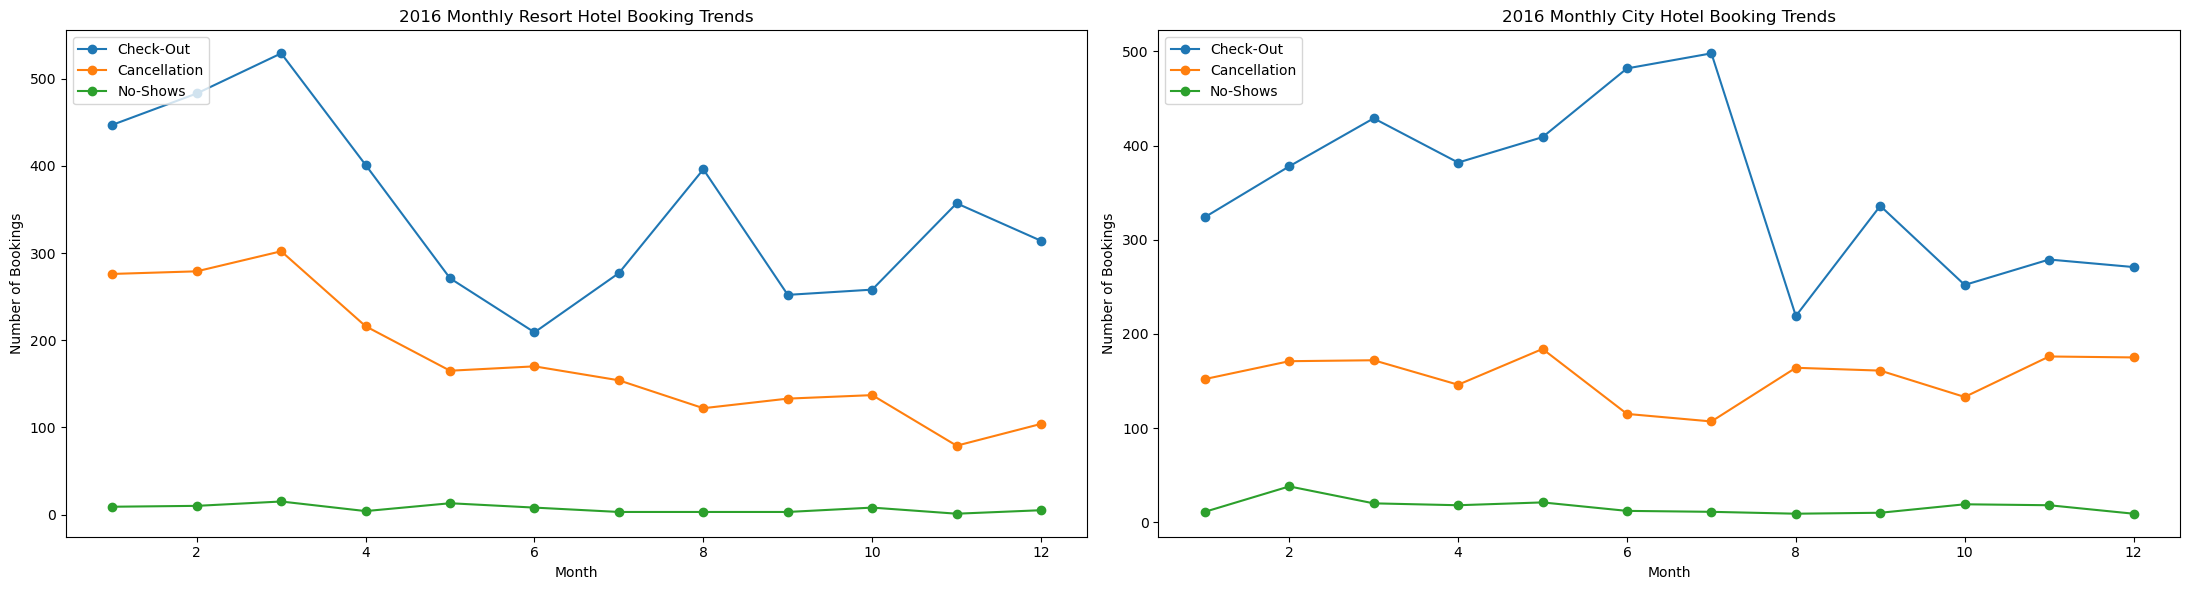

In [34]:
plt.figure(figsize=(22, 6))

# First subplot: Resort Hotel Booking Trends
plt.subplot(1, 2, 1)
plt.plot(monthly_bookings_checkouts_resort_2016['reservation_month'], monthly_bookings_checkouts_resort_2016['num_bookings'], marker='o', label='Check-Out')
plt.plot(monthly_bookings_cancellation_resort_2016['reservation_month'], monthly_bookings_cancellation_resort_2016['num_bookings'], marker='o', label='Cancellation')
plt.plot(monthly_bookings_noshows_resort_2016['reservation_month'], monthly_bookings_noshows_resort_2016['num_bookings'], marker='o', label='No-Shows')
plt.title('2016 Monthly Resort Hotel Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(loc='upper left')

# Second subplot: City Hotel Booking Trends
plt.subplot(1, 2, 2)
plt.plot(monthly_bookings_checkouts_city_2016['reservation_month'], monthly_bookings_checkouts_city_2016['num_bookings'], marker='o', label='Check-Out')
plt.plot(monthly_bookings_cancellation_city_2016['reservation_month'], monthly_bookings_cancellation_city_2016['num_bookings'], marker='o', label='Cancellation')
plt.plot(monthly_bookings_noshows_city_2016['reservation_month'], monthly_bookings_noshows_city_2016['num_bookings'], marker='o', label='No-Shows')
plt.title('2016 Monthly City Hotel Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


#### Summary & Conclusion

1. Resort Hotel
 - The data shows the peak booking season and the busiest month is in Q1, to be precise in March.
 - After that the downfall comes right after that which is in Q2, the lowest is in June.
 - The cancellation cases correlates with the check-out which have ist peak in Q1, in March.
 - The lowest cancellation cases is in November.
 - For No-shows cases, the graph is consistens for this year, which shows the peak and drop only slightly difference.

2. City Hotel
 - The data fro city hotel shows the positive graph in the Q1 and Q2, and reach its peak in July.
 - But when its reach the peak, after that its also reach the bottom in August with the lowest check-out cases.
 - The cancellation trends for city hotel is not that fluctuatif, the difference from the peak and bottom is less than last year cancellation trends.
 - The peak cancellation is in May and the lowest is in July.
 - No-shows didn't have the crucial waves from the graph, it's almost consistent for this year, February is the peak and January is the bottom.


### 2017

In [35]:
year_2017_checkouts_resort = dfHotel[(dfHotel['reservation_year'] == 2017) & (dfHotel['reservation_status'] == 'Check-Out') & (dfHotel['hotel'] == 'Resort Hotel')]
year_2017_checkouts_city = dfHotel[(dfHotel['reservation_year'] == 2017) & (dfHotel['reservation_status'] == 'Check-Out') & (dfHotel['hotel'] == 'City Hotel')]

year_2017_cancellation_resort = dfHotel[(dfHotel['reservation_year'] == 2017) & (dfHotel['reservation_status'] == 'Canceled') & (dfHotel['hotel'] == 'Resort Hotel')]
year_2017_cancellation_city = dfHotel[(dfHotel['reservation_year'] == 2017) & (dfHotel['reservation_status'] == 'Canceled') & (dfHotel['hotel'] == 'City Hotel')]


year_2017_noshows_resort = dfHotel[(dfHotel['reservation_year'] == 2017) & (dfHotel['reservation_status'] == 'No-Show') & (dfHotel['hotel'] == 'Resort Hotel')]
year_2017_noshows_city = dfHotel[(dfHotel['reservation_year'] == 2017) & (dfHotel['reservation_status'] == 'No-Show') & (dfHotel['hotel'] == 'City Hotel')]


print('Check-Out Resort Hotel : ', year_2017_checkouts_resort.shape)
print('Check-Out City Hotel : ', year_2017_checkouts_city.shape)

print('Cancellation Resort Hotel : ', year_2017_cancellation_resort.shape)
print('Cancellation City Hotel : ', year_2017_cancellation_city.shape)

print('No-Shows Resort Hotel : ', year_2017_noshows_resort.shape)
print('No-Shows City Hotel : ', year_2017_noshows_city.shape)


Check-Out Resort Hotel :  (2791, 12)
Check-Out City Hotel :  (2014, 12)
Cancellation Resort Hotel :  (1130, 12)
Cancellation City Hotel :  (1120, 12)
No-Shows Resort Hotel :  (78, 12)
No-Shows City Hotel :  (101, 12)


In [36]:
# Resort Hotel
monthly_bookings_checkouts_resort_2017 = year_2017_checkouts_resort.groupby('reservation_month').size().reset_index(name='num_bookings')
monthly_bookings_cancellation_resort_2017 = year_2017_cancellation_resort.groupby('reservation_month').size().reset_index(name='num_bookings')
monthly_bookings_noshows_resort_2017 = year_2017_noshows_resort.groupby('reservation_month').size().reset_index(name='num_bookings')

# City Hotel
monthly_bookings_checkouts_city_2017 = year_2017_checkouts_city.groupby('reservation_month').size().reset_index(name='num_bookings')
monthly_bookings_cancellation_city_2017 = year_2017_cancellation_city.groupby('reservation_month').size().reset_index(name='num_bookings')
monthly_bookings_noshows_city_2017 = year_2017_noshows_city.groupby('reservation_month').size().reset_index(name='num_bookings')




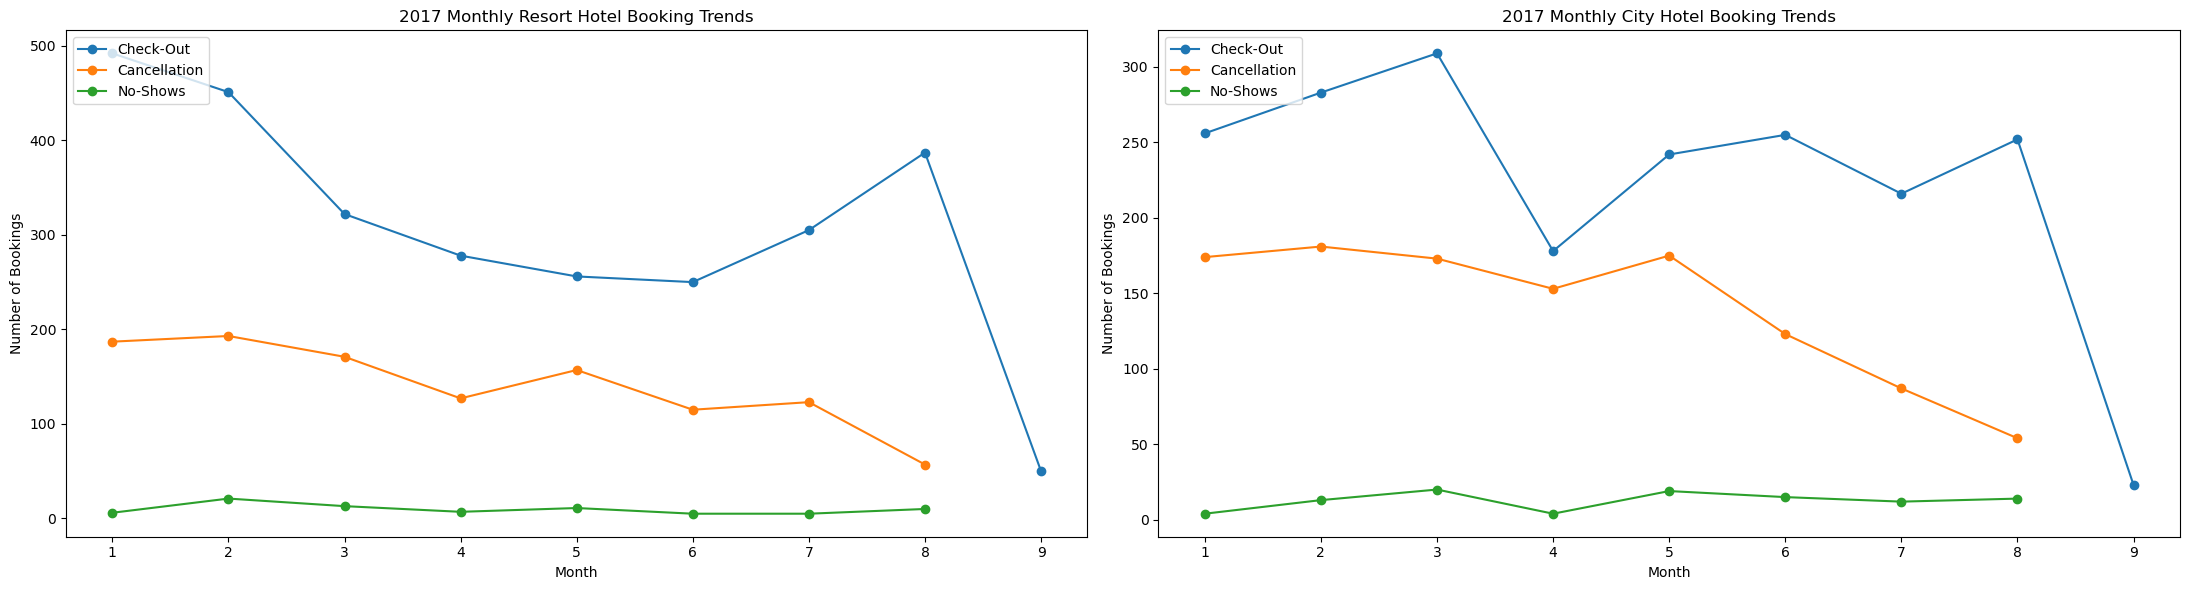

In [37]:
plt.figure(figsize=(22, 6))

# First subplot: Resort Hotel Booking Trends
plt.subplot(1, 2, 1)
plt.plot(monthly_bookings_checkouts_resort_2017['reservation_month'], monthly_bookings_checkouts_resort_2017['num_bookings'], marker='o', label='Check-Out')
plt.plot(monthly_bookings_cancellation_resort_2017['reservation_month'], monthly_bookings_cancellation_resort_2017['num_bookings'], marker='o', label='Cancellation')
plt.plot(monthly_bookings_noshows_resort_2017['reservation_month'], monthly_bookings_noshows_resort_2017['num_bookings'], marker='o', label='No-Shows')
plt.title('2017 Monthly Resort Hotel Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(loc='upper left')

# Second subplot: City Hotel Booking Trends
plt.subplot(1, 2, 2)
plt.plot(monthly_bookings_checkouts_city_2017['reservation_month'], monthly_bookings_checkouts_city_2017['num_bookings'], marker='o', label='Check-Out')
plt.plot(monthly_bookings_cancellation_city_2017['reservation_month'], monthly_bookings_cancellation_city_2017['num_bookings'], marker='o', label='Cancellation')
plt.plot(monthly_bookings_noshows_city_2017['reservation_month'], monthly_bookings_noshows_city_2017['num_bookings'], marker='o', label='No-Shows')
plt.title('2017 Monthly City Hotel Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


#### Summary & Conclusion

1. Resort Hotel
 - The hotel have the busiest month in January, and it is slowly going down till June and growing again till August
 - The cancellation have its peak in February and the lowest in August.
 - No-shows still consistent and have its peak in february
 - Data for September is not valid because the data only cover the early day in September so its not compatible for the analysis.

2. City Hotel
 - Q1 for the hotel still shows the busiest months which reach its peak in March and the bottom in April.
 - The cancellation cases reach its peak in May and the trends slowly going down till August. 
 - No-Shows have consistent move and reach its peak in March and May and the bottom in January abd April.
 - Data for September is not valid because the data only cover the early day in September so its not compatible for the analysis.

## Booking Sources

### Revenue

In [38]:
Reserv = dfHotel[(dfHotel['reservation_year'] == 2015) & (dfHotel['is_canceled'] == 0)]

Reserv['RevenueP'] = Reserv['total_night'] * Reserv['NewAdr']
# Display the result
Reserv


,hotel,is_canceled,arrival_date,total_night,distribution_channel,reservation_status,reservation_status_date,reservation_year,reservation_month,reservation_day,NewAdr,Revenue,RevenueP
0,Resort Hotel,0,2015-07-01,2,Direct,Check-Out,2015-07-03,2015,7,3,107.00,214.00,214.00
1,Resort Hotel,0,2015-07-01,2,Direct,Check-Out,2015-07-03,2015,7,3,103.00,206.00,206.00
5,Resort Hotel,0,2015-07-01,4,TA/TO,Check-Out,2015-07-05,2015,7,5,145.00,580.00,580.00
6,Resort Hotel,0,2015-07-01,4,TA/TO,Check-Out,2015-07-05,2015,7,5,94.71,378.84,378.84
7,Resort Hotel,0,2015-07-01,4,TA/TO,Check-Out,2015-07-05,2015,7,5,97.50,390.00,390.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21207,City Hotel,0,2015-12-16,1,Direct,Check-Out,2015-12-17,2015,12,17,50.00,50.00,50.00
21306,City Hotel,0,2015-10-15,1,TA/TO,Check-Out,2015-10-16,2015,10,16,1.00,1.00,1.00
21307,City Hotel,0,2015-12-12,1,TA/TO,Check-Out,2015-12-13,2015,12,13,1.00,1.00,1.00
21318,City Hotel,0,2015-12-16,1,Direct,Check-Out,2015-12-17,2015,12,17,1.00,1.00,1.00


In [39]:
Reserv_2016 = dfHotel[(dfHotel['reservation_year'] == 2016) & (dfHotel['is_canceled'] == 0)]

Reserv_2016['RevenueP'] = Reserv_2016['total_night'] * Reserv_2016['NewAdr']
# Display the result
Reserv_2016


,hotel,is_canceled,arrival_date,total_night,distribution_channel,reservation_status,reservation_status_date,reservation_year,reservation_month,reservation_day,NewAdr,Revenue,RevenueP
1721,Resort Hotel,0,2015-12-28,4,TA/TO,Check-Out,2016-01-01,2016,1,1,89.50,358.00,358.00
1723,Resort Hotel,0,2015-12-29,9,TA/TO,Check-Out,2016-01-07,2016,1,7,73.70,663.30,663.30
1725,Resort Hotel,0,2015-12-30,3,Direct,Check-Out,2016-01-02,2016,1,2,204.33,612.99,612.99
1726,Resort Hotel,0,2015-12-30,4,TA/TO,Check-Out,2016-01-03,2016,1,3,136.50,546.00,546.00
1727,Resort Hotel,0,2015-12-30,4,TA/TO,Check-Out,2016-01-03,2016,1,3,136.50,546.00,546.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25230,City Hotel,0,2016-12-27,3,Direct,Check-Out,2016-12-30,2016,12,30,97.00,291.00,291.00
25231,City Hotel,0,2016-12-28,3,TA/TO,Check-Out,2016-12-31,2016,12,31,125.66,376.98,376.98
25232,City Hotel,0,2016-12-30,1,TA/TO,Check-Out,2016-12-31,2016,12,31,68.00,68.00,68.00
25233,City Hotel,0,2016-12-29,2,TA/TO,Check-Out,2016-12-31,2016,12,31,117.73,235.46,235.46


In [40]:
Reserv_2017 = dfHotel[(dfHotel['reservation_year'] == 2017) & (dfHotel['is_canceled'] == 0)]

Reserv_2017['RevenueP'] =Reserv_2017['total_night'] *Reserv_2017['NewAdr']
# Display the result
Reserv_2017


,hotel,is_canceled,arrival_date,total_night,distribution_channel,reservation_status,reservation_status_date,reservation_year,reservation_month,reservation_day,NewAdr,Revenue,RevenueP
4113,Resort Hotel,0,2017-01-25,1,Corporate,Check-Out,2017-01-26,2017,1,26,35.00,35.00,35.00
4469,Resort Hotel,0,2017-04-21,1,Direct,Check-Out,2017-04-22,2017,4,22,1.00,1.00,1.00
4473,Resort Hotel,0,2017-04-21,11,Direct,Check-Out,2017-05-02,2017,5,2,85.00,935.00,935.00
4493,Resort Hotel,0,2017-04-27,1,Direct,Check-Out,2017-04-28,2017,4,28,76.00,76.00,76.00
4580,Resort Hotel,0,2017-05-15,1,Corporate,Check-Out,2017-05-16,2017,5,16,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26908,City Hotel,0,2017-08-30,4,TA/TO,Check-Out,2017-09-03,2017,9,3,129.60,518.40,518.40
26909,City Hotel,0,2017-08-29,5,Direct,Check-Out,2017-09-03,2017,9,3,171.00,855.00,855.00
26910,City Hotel,0,2017-08-31,4,TA/TO,Check-Out,2017-09-04,2017,9,4,91.02,364.08,364.08
26911,City Hotel,0,2017-08-28,7,TA/TO,Check-Out,2017-09-04,2017,9,4,85.59,599.13,599.13


In [41]:
# Make a specific year to analysis
specific_year = 2015
df_specific_year = Reserv[Reserv['reservation_year'] == specific_year]

# Group by distribution channel and calculate the sum of revenue for that year
revenue_by_channel = df_specific_year.groupby('distribution_channel')['RevenueP'].sum().reset_index()

# Display the result
print(revenue_by_channel)

  distribution_channel   RevenueP
0            Corporate   58365.73
1               Direct  390683.99
2                TA/TO  781460.85
3            Undefined     563.50


In [42]:
# Make a specific year to analysis
specific_year_2016 = 2016
df_specific_year_2016 = Reserv_2016[Reserv_2016['reservation_year'] == specific_year_2016]

# Group by distribution channel and calculate the sum of revenue for that year
revenue_by_channel_2016 = df_specific_year_2016.groupby('distribution_channel')['RevenueP'].sum().reset_index()

# Display the result
print(revenue_by_channel_2016)

  distribution_channel    RevenueP
0            Corporate   167430.90
1               Direct   595991.63
2                  GDS     1900.00
3                TA/TO  1324657.47


In [43]:
# Make a specific year to analysis
df_specific_year_2017 = Reserv_2017[Reserv_2017['reservation_year'] == 2017]

# Group by distribution channel and calculate the sum of revenue for that year
revenue_by_channel_2017 = df_specific_year_2017.groupby('distribution_channel')['RevenueP'].sum().reset_index()

# Display the result
print(revenue_by_channel_2017)

  distribution_channel   RevenueP
0            Corporate   98359.89
1               Direct  497030.46
2                  GDS    1475.00
3                TA/TO  837991.55


([0, 1, 2, 3],
 [Text(0, 0, 'Corporate'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'GDS'),
  Text(3, 0, 'TA/TO')])

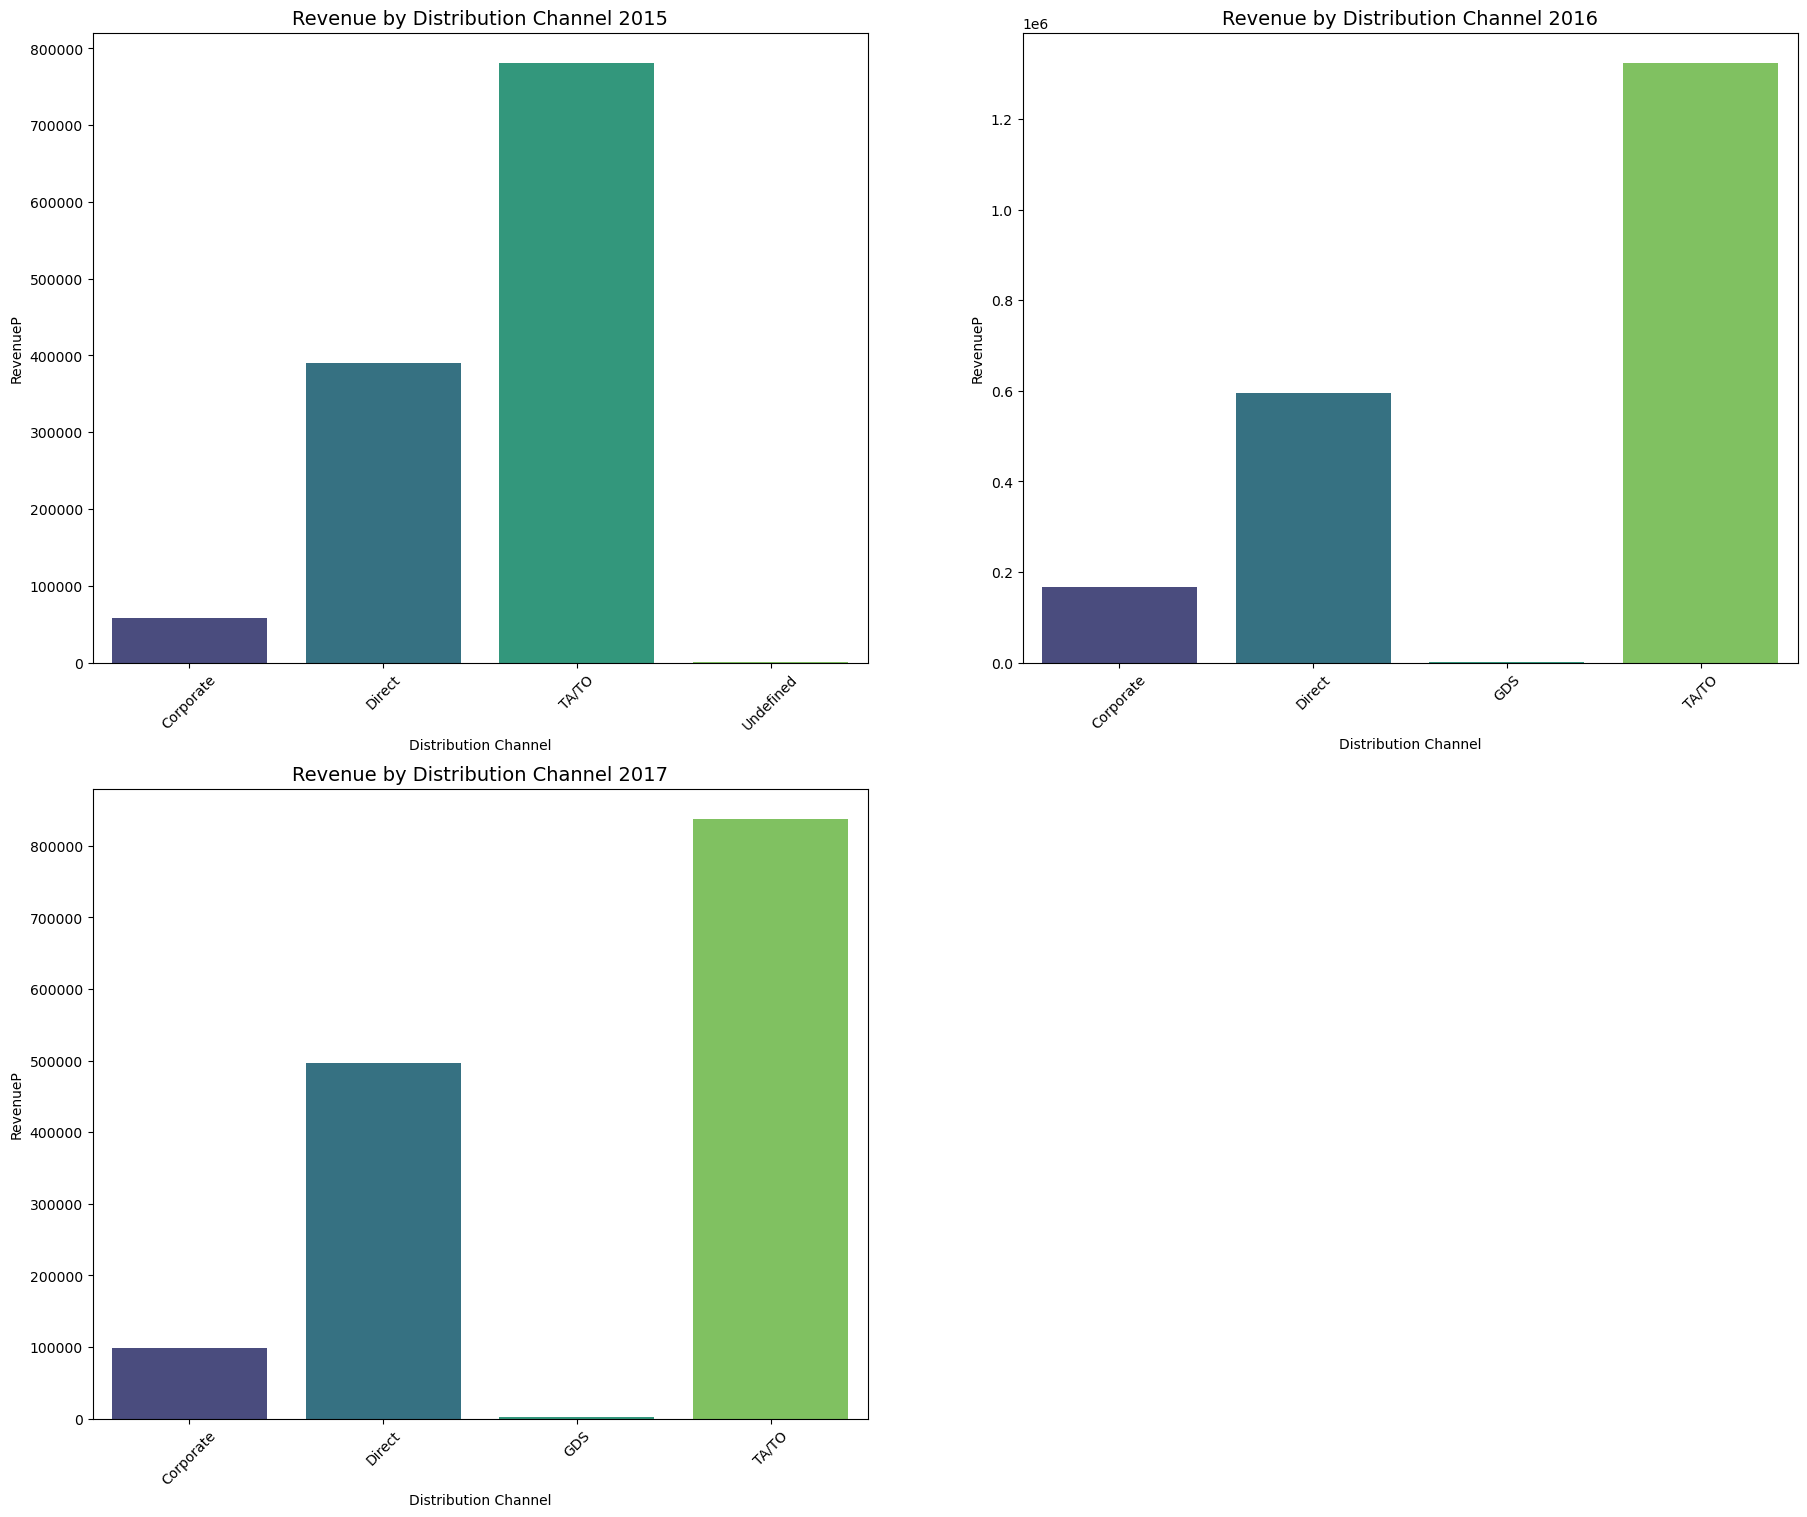

In [44]:
plt.figure(figsize=(22, 18))


# Adding titles and labels
plt.subplot(2, 2, 1)
sns.barplot(x='distribution_channel', y='RevenueP', data=revenue_by_channel, palette='viridis')
plt.title('Revenue by Distribution Channel 2015', fontsize=14)
plt.xlabel('Distribution Channel', fontsize=10)
plt.ylabel('RevenueP', fontsize=10)
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.barplot(x='distribution_channel', y='RevenueP', data=revenue_by_channel_2016, palette='viridis')
plt.title('Revenue by Distribution Channel 2016', fontsize=14)
plt.xlabel('Distribution Channel', fontsize=10)
plt.ylabel('RevenueP', fontsize=10)
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.barplot(x='distribution_channel', y='RevenueP', data=revenue_by_channel_2017, palette='viridis')
plt.title('Revenue by Distribution Channel 2017', fontsize=14)
plt.xlabel('Distribution Channel', fontsize=10)
plt.ylabel('RevenueP', fontsize=10)
plt.xticks(rotation=45)

#### Summary & Conclusion

- As the data presented above distribution from TA/TO is always dominated the top revenue for each year, 2015 - 2017.
- Direct distribution comes second and Corporate comes third in 2015.
- The data revenue of distribution channel for each year is always the same, whose shows TA/TO comes first, Direct comes second, and Corporate Comes third
- The difference occur only in 2015 there is a distribution marked as 'Undefined' and 2016, 2017 there is a distribution channel mark 'GDS'.
- Total Revenue for TA/TO : 2944109.87, Direct : 1483706.08, Corporate : 324156.52, GDS : 3375, Undefined : 563.5

### Cancellation Rate

In [45]:
# Step 1: Filter data for 2015
Cancel_2015 = dfHotel[dfHotel['reservation_year'] == 2015]

# Step 2: Calculate total reservations per distribution channel
total_reservations = Cancel_2015.groupby('distribution_channel').size().reset_index(name='Total Reservations')

# Step 3: Calculate canceled reservations per distribution channel
canceled_reservations = Cancel_2015[Cancel_2015['is_canceled'] == 1].groupby('distribution_channel').size().reset_index(name='Canceled Reservations')

# Step 4: Merge the two DataFrames to align total and canceled reservations
merged_data = pd.merge(total_reservations, canceled_reservations, on='distribution_channel', how='left')

# Step 5: Calculate the cancellation rate
merged_data['Cancellation Rate (%)'] = (merged_data['Canceled Reservations'] / merged_data['Total Reservations']) * 100

# Fill NaN values with 0 (in case there are channels with no cancellations)
merged_data['Canceled Reservations'].fillna(0, inplace=True)
merged_data['Cancellation Rate (%)'].fillna(0, inplace=True)

# Display the result
print(merged_data)


  distribution_channel  Total Reservations  Canceled Reservations  \
0            Corporate                 604                    107   
1               Direct                1443                    338   
2                TA/TO                4891                   2617   
3            Undefined                   5                      4   

   Cancellation Rate (%)  
0              17.715232  
1              23.423423  
2              53.506440  
3              80.000000  


In [46]:
# Step 1: Filter data for 2016
Cancel_2016 = dfHotel[dfHotel['reservation_year'] == 2016]

# Step 2: Calculate total reservations per distribution channel
total_reservations_2016 = Cancel_2016.groupby('distribution_channel').size().reset_index(name='Total Reservations')

# Step 3: Calculate canceled reservations per distribution channel
canceled_reservations_2016 = Cancel_2016[Cancel_2016['is_canceled'] == 1].groupby('distribution_channel').size().reset_index(name='Canceled Reservations')

# Step 4: Merge the two DataFrames to align total and canceled reservations
merged_data_2016 = pd.merge(total_reservations_2016, canceled_reservations_2016, on='distribution_channel', how='left')

# Step 5: Calculate the cancellation rate
merged_data_2016['Cancellation Rate (%)'] = (merged_data_2016['Canceled Reservations'] / merged_data_2016['Total Reservations']) * 100

# Fill NaN values with 0 (in case there are channels with no cancellations)
merged_data_2016['Canceled Reservations'].fillna(0, inplace=True)
merged_data_2016['Cancellation Rate (%)'].fillna(0, inplace=True)

# Display the result
print(merged_data_2016)


  distribution_channel  Total Reservations  Canceled Reservations  \
0            Corporate                1775                    297   
1               Direct                2849                    540   
2                  GDS                  11                      3   
3                TA/TO                8089                   3431   

   Cancellation Rate (%)  
0              16.732394  
1              18.954019  
2              27.272727  
3              42.415626  


In [47]:
# Step 1: Filter data for 2017
Cancel_2017 = dfHotel[dfHotel['reservation_year'] == 2017]

# Step 2: Calculate total reservations per distribution channel
total_reservations_2017 = Cancel_2017.groupby('distribution_channel').size().reset_index(name='Total Reservations')

# Step 3: Calculate canceled reservations per distribution channel
canceled_reservations_2017 = Cancel_2017[Cancel_2017['is_canceled'] == 1].groupby('distribution_channel').size().reset_index(name='Canceled Reservations')

# Step 4: Merge the two DataFrames to align total and canceled reservations
merged_data_2017 = pd.merge(total_reservations_2017, canceled_reservations_2017, on='distribution_channel', how='left')

# Step 5: Calculate the cancellation rate
merged_data_2017['Cancellation Rate (%)'] = (merged_data_2017['Canceled Reservations'] / merged_data_2017['Total Reservations']) * 100

# Fill NaN values with 0 (in case there are channels with no cancellations)
merged_data_2017['Canceled Reservations'].fillna(0, inplace=True)
merged_data_2017['Cancellation Rate (%)'].fillna(0, inplace=True)

# Display the result
print(merged_data_2017)


  distribution_channel  Total Reservations  Canceled Reservations  \
0            Corporate                1036                  190.0   
1               Direct                1893                  354.0   
2                  GDS                   6                    0.0   
3                TA/TO                4299                 1885.0   

   Cancellation Rate (%)  
0              18.339768  
1              18.700475  
2               0.000000  
3              43.847406  


Text(0.5, 1.0, 'Cancellation Rate by Distribution Channel in 2017')

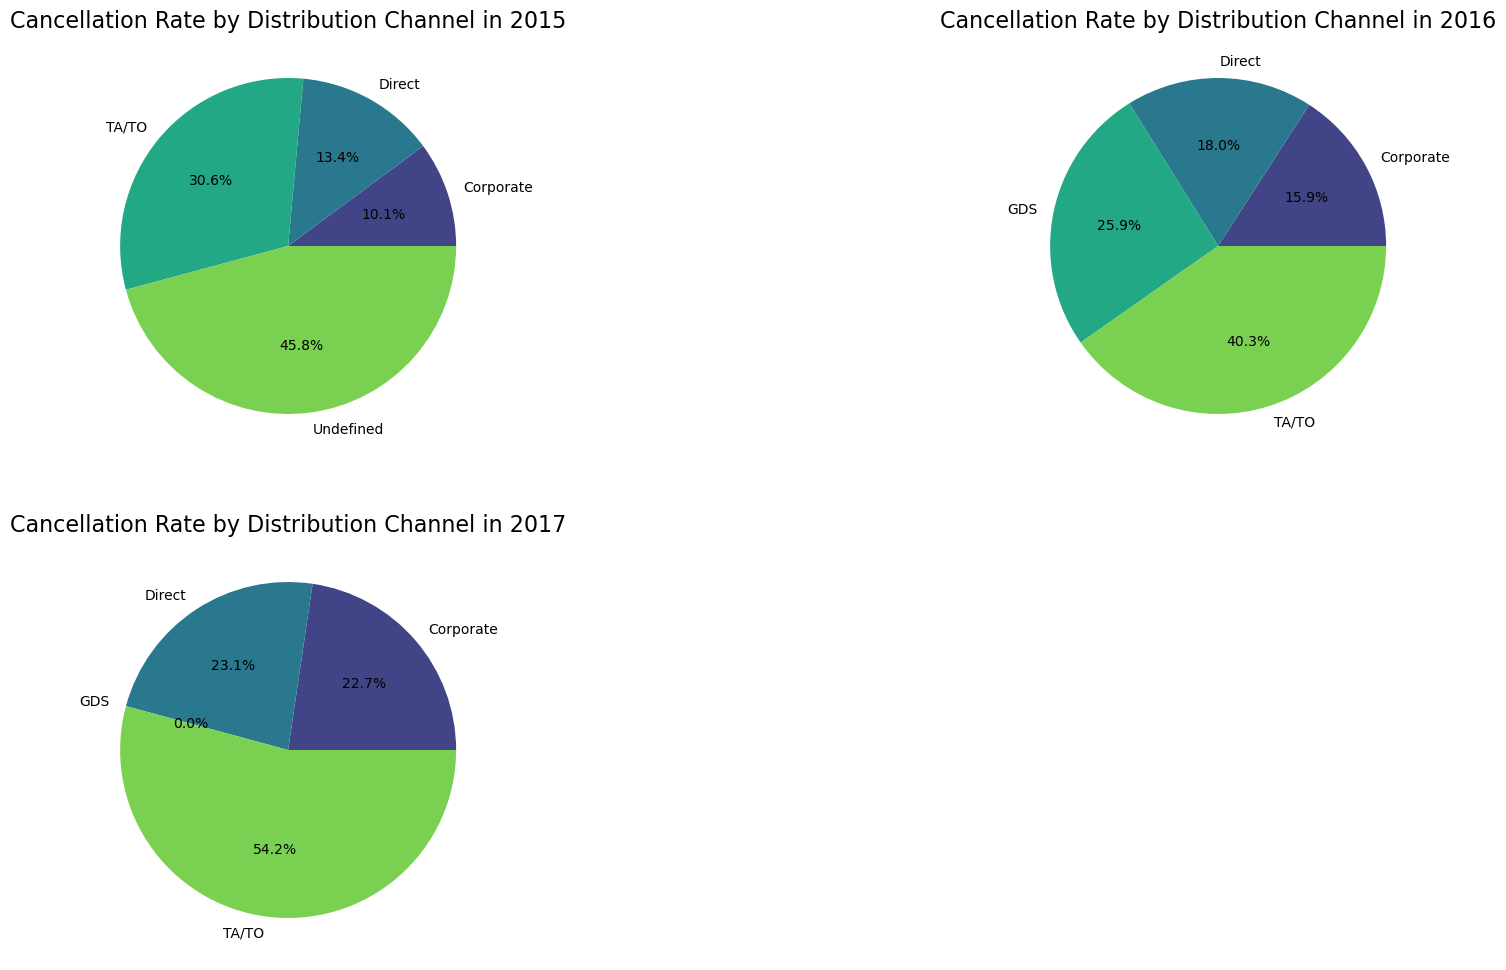

In [48]:
plt.figure(figsize=(22, 12))


plt.subplot(2, 2, 1)
plt.pie(merged_data['Cancellation Rate (%)'], labels=merged_data['distribution_channel'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(merged_data)))
plt.title('Cancellation Rate by Distribution Channel in 2015', fontsize=16)

plt.subplot(2, 2, 2)
plt.pie(merged_data_2016['Cancellation Rate (%)'], labels=merged_data_2016['distribution_channel'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(merged_data_2016)))
plt.title('Cancellation Rate by Distribution Channel in 2016', fontsize=16)

plt.subplot(2, 2, 3)
plt.pie(merged_data_2017['Cancellation Rate (%)'], labels=merged_data_2017['distribution_channel'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(merged_data_2017)))
plt.title('Cancellation Rate by Distribution Channel in 2017', fontsize=16)

#### Summary & Conclusion

- Cancellation rate in 2015, shows undefined as the biggest cancellation rate, this can be happening because total reserevation of undefined channel only 5 with 4 cancellation.
- TA/TO comes second in 2015, with also the biggest total reservation and aligned with the total cancellation, Direct comes third, and corporate comes last.
- In 2016, TA/TO shows the biggest cancellation rate with total reservation 8089 and total cancellation 3431.
- GDS comes in second, Direct comes third and corporate comes last.
- In 2017, TA/TO once again comes first as the biggest cancellation rate with total reservation 4299 and total cancellation 1885.
- Direct comes second and corporate comes third, GDS comes last with 0% cancellation rate with 6 total reservation success.

### Total Night Stayed

In [49]:
# Step 1: Filter data for 2015
stays_2015 = dfHotel[dfHotel['reservation_year'] == 2015]

# Step 2: Calculate the average total nights stayed per distribution channel
avg_stay_per_channel = stays_2015.groupby('distribution_channel')['total_night'].mean().reset_index(name='Average Nights Stayed')

# Display the results
print(avg_stay_per_channel)


  distribution_channel  Average Nights Stayed
0            Corporate               2.324503
1               Direct               3.191961
2                TA/TO               3.789409
3            Undefined               3.400000


In [50]:
# Step 1: Filter data for 2016
stays_2016 = dfHotel[dfHotel['reservation_year'] == 2016]

# Step 2: Calculate the average total nights stayed per distribution channel
avg_stay_per_channel_2016 = stays_2016.groupby('distribution_channel')['total_night'].mean().reset_index(name='Average Nights Stayed')

# Display the results
print(avg_stay_per_channel_2016)


  distribution_channel  Average Nights Stayed
0            Corporate               1.855211
1               Direct               2.574939
2                  GDS               2.181818
3                TA/TO               3.410434


In [51]:
# Step 1: Filter data for 2017
stays_2017 = dfHotel[dfHotel['reservation_year'] == 2017]

# Step 2: Calculate the average total nights stayed per distribution channel
avg_stay_per_channel_2017 = stays_2017.groupby('distribution_channel')['total_night'].mean().reset_index(name='Average Nights Stayed')

# Display the results
print(avg_stay_per_channel_2017)


  distribution_channel  Average Nights Stayed
0            Corporate               2.004826
1               Direct               2.653988
2                  GDS               1.833333
3                TA/TO               3.453361


([0, 1, 2, 3],
 [Text(0, 0, 'Corporate'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'GDS'),
  Text(3, 0, 'TA/TO')])

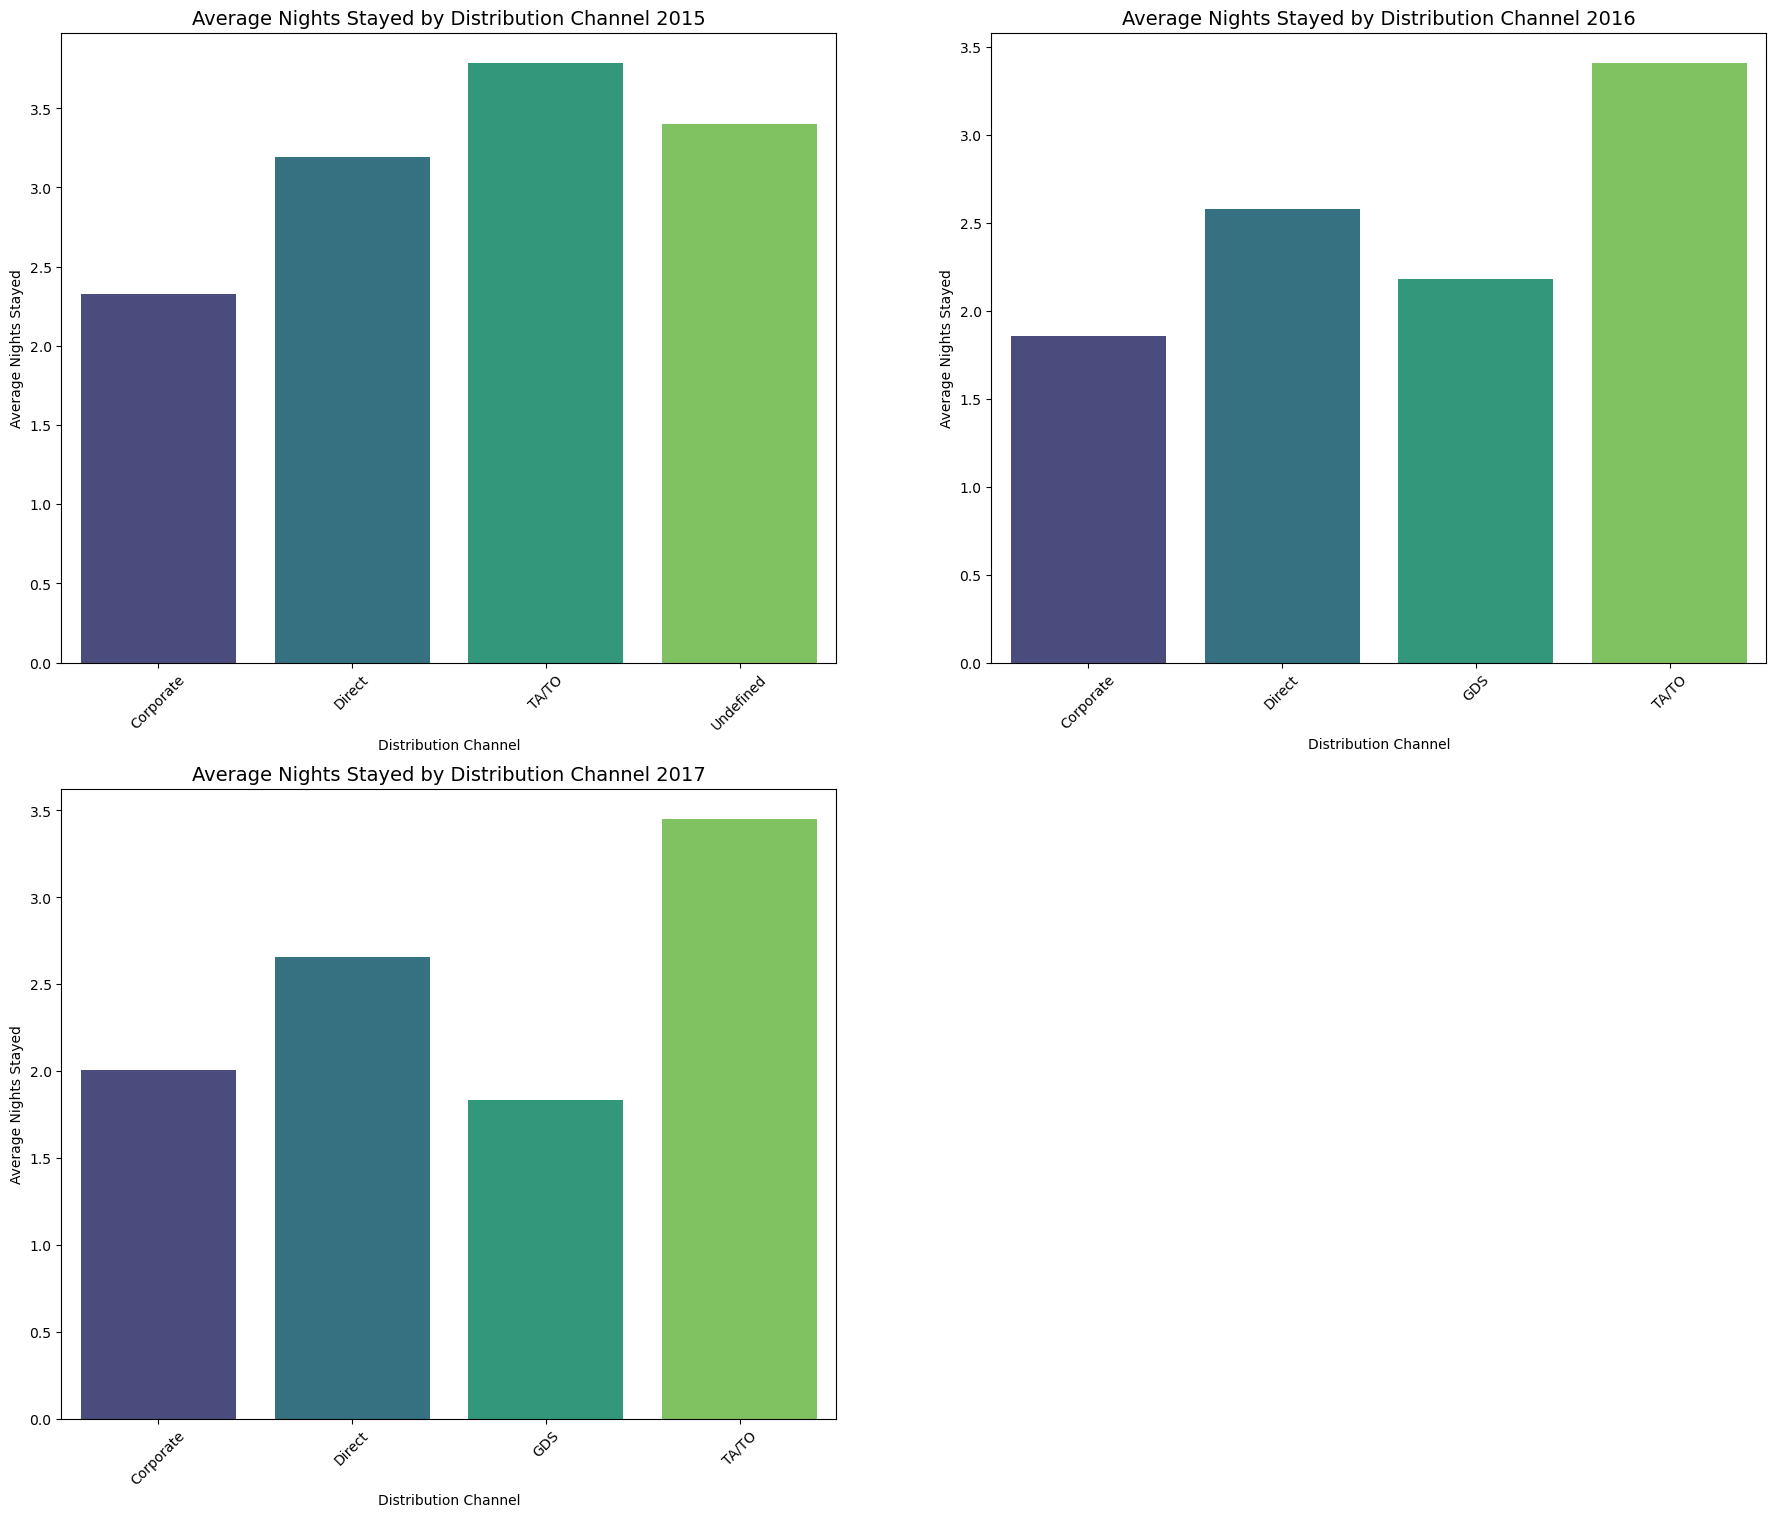

In [52]:
plt.figure(figsize=(22, 18))


# Adding titles and labels
plt.subplot(2, 2, 1)
sns.barplot(x='distribution_channel', y='Average Nights Stayed', data=avg_stay_per_channel, palette='viridis')
plt.title('Average Nights Stayed by Distribution Channel 2015', fontsize=14)
plt.xlabel('Distribution Channel', fontsize=10)
plt.ylabel('Average Nights Stayed', fontsize=10)
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.barplot(x='distribution_channel', y='Average Nights Stayed', data=avg_stay_per_channel_2016, palette='viridis')
plt.title('Average Nights Stayed by Distribution Channel 2016', fontsize=14)
plt.xlabel('Distribution Channel', fontsize=10)
plt.ylabel('Average Nights Stayed', fontsize=10)
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.barplot(x='distribution_channel', y='Average Nights Stayed', data=avg_stay_per_channel_2017, palette='viridis')
plt.title('Average Nights Stayed by Distribution Channel 2017', fontsize=14)
plt.xlabel('Distribution Channel', fontsize=10)
plt.ylabel('Average Nights Stayed', fontsize=10)
plt.xticks(rotation=45)

#### Summary & Conclusion

- In 2015, TA/TO comes first with avg guests stayed at 3.7, followed by undifined in second place with avg 3.4, Direct comes third with avg 3.1, and last is corporate with 2.3 avg.
- In 2016, TA/TO still at the top with avg 3.4, Direct comes second with avg 2.5, GDS comes third with avg 2.1, and last is corporate with 1.8 avg.
- In 2017, In three years TA/TO comes in the first place again with avg 3.4, followed by direct with 2.6 avg, corporate in the third place with 2.0 avg and GDS in the last place with 1.8 avg.

## Summary & Insight

### Summary

1. TA/TO
 - Total Reservation    : 17.279
 - Total Cancellation   : 7.933
 - Total Booking Succes : 9.346
 - AVG Night Stay       : 10,5
 - Revenue              : 2944109.87

2. Direct
 - Total Reservation    : 6.185
 - Total Cancellation   : 1.232
 - Total Booking Succes : 4.953
 - AVG Night Stay       : 8,2
 - Revenue              : 1483706.08

3. Corporate
 - Total Reservation    : 3.415
 - Total Cancellation   : 594
 - Total Booking Succes : 2.821
 - AVG Night Stay       : 6,1
 - Revenue              : 324156.52

4. GDS
 - Total Reservation    : 17
 - Total Cancellation   : 3
 - Total Booking Succes : 14
 - AVG Night Stay       : 3,9
 - Revenue              : 3375

5. Undifined
 - Total Reservation    : 5
 - Total Cancellation   : 4
 - Total Booking Succes : 1
 - AVG Night Stay       : 3,4
 - Revenue              : 563.5

### Insight

1. Based on the analysis of Resort and City hotel above, Resort hotel is more popular than the city hotel in Portugal.
2. Even though resort hotel has more guests but the cancellation reservation between the resort hotel and city hotel only have slightly differences.
3. Based on the Booking Sources analysis above, TA/TO has the best value for the hotel. TA/TO contributes around 17.279 total reservation and 9.346 total succes reservation. They also can attact valuable guests who stayed for 10,5 avg night and contribute with the biggest revenue.
4. Hotel also can put more effort and strategical moves for Direct and Corporation, so this two Distribution channel can gain more influences for the guests and contribute more to the hotel.
5. For GDS and Undfined, Because of the biggest gap around these two distribution channel and the other, closed them and focused more on the other who have potential to attract and gain more guests for the hotel.